In [ ]:
#Classification with Neural Networks using Python

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Image Label : 5


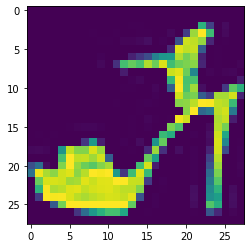

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


Building a Neural Network Architecture
Now I will build a neural network architecture with two hidden layers:


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


Before training our model, I will split the training data into training and validation sets:

In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

Training a Classification Model with Neural Networks
Now here’s how we can train a neural network for the task of image classification:

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7206 - accuracy: 0.7617 - val_loss: 0.5196 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8297 - val_loss: 0.4555 - val_accuracy: 0.8414
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4472 - accuracy: 0.8435 - val_loss: 0.4148 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4184 - accuracy: 0.8530 - val_loss: 0.4080 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3987 - accuracy: 0.8600 - val_loss: 0.3894 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3818 - accuracy: 0.8647 - val_loss: 0.4104 - val_accuracy: 0.8520
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3666 - accuracy: 0.8702 - val_loss: 0.3669 - val_accuracy:

Now let’s have a look at the predictions:

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Here is how we can look at the predicted classes:

In [8]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
